<a href="https://colab.research.google.com/github/kd303/tensorflow_coursera/blob/master/Horse_or_Human_WithAugmentation-research_on_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip
  
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

--2019-08-05 11:45:57--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   184MB/s    in 0.8s    

2019-08-05 11:45:58 (184 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]

--2019-08-05 11:46:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 2a00:1450:400c:c0a::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/z

## Building a Small Model from Scratch

But before we continue, let's start defining the model:

Step 1 will be to import tensorflow.

In [0]:
import tensorflow as tf

We then add convolutional layers as in the previous example, and flatten the final result to feed into the densely connected layers.

Finally we add the densely connected layers. 

Note that because we are facing a two-class classification problem, i.e. a *binary classification problem*, we will end our network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function), so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [0]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=100,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/100
8/8 [==============================] - 24s 3s/step - loss: 0.1691 - acc: 0.9533 - val_loss: 0.6053 - val_acc: 0.8242
Epoch 2/100
8/8 [==============================] - 22s 3s/step - loss: 0.0898 - acc: 0.9778 - val_loss: 0.7375 - val_acc: 0.8281
Epoch 3/100
8/8 [==============================] - 25s 3s/step - loss: 0.0551 - acc: 0.9863 - val_loss: 0.9811 - val_acc: 0.8281
Epoch 4/100
8/8 [==============================] - 19s 2s/step - loss: 0.0446 - acc: 0.9871 - val_loss: 1.1689 - val_acc: 0.8281
Epoch 5/100
8/8 [==============================] - 25s 3s/step - loss: 0.0211 - acc: 0.9941 - val_loss: 1.3088 - val_acc: 0.8320
Epoch 6/100
8/8 [==============================] - 22s 3s/step - loss: 0.0197 - acc: 0.9944 - val_loss: 1.5383 - val_acc: 0.8242
Epoch 7/100
8/8 [==============================] - 19s 2s/step - loss: 0.0232 - acc: 0.9897 - val_loss: 1.7307 - val_acc: 0.8164
Epoch 8/100
8/8 [==============================] - 22s 3s/step - loss: 0.0146 - acc: 0.9944 - val

In [0]:
predicted_lbls = model.predict_generator(validation_generator, verbose=1)
validation_generator

8/8 [==============================] - 1s 141ms/step


In [0]:
print(predicted_lbls)
import numpy as np
#print(np.rint(predicted_lbls))

[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.9168854e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [4.1707027e-01]
 [1.0000000e+00]
 [4.1105449e-03]
 [9.9999988e-01]
 [5.2433002e-01]
 [6.8116307e-02]
 [1.0000000e+00]
 [9.9999946e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.8018951e-03]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.1700561e-02]
 [8.8914436e-01]
 [3.7346596e-01]
 [3.4987926e-05]
 [2.2670627e-04]
 [1.0000000e+00]
 [9.9999976e-01]
 [6.7530274e-03]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.2490523e-01]
 [1.0000000e+00]
 [9.9975359e-01]
 [1.0000000e+00]
 [2.9832125e-05]
 [1.0000000e+00]
 [9.6350086e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.2034178e-04]
 [4.4259131e-03]
 [1.0000000e+00]
 [9.9999988e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [5.3152472e-02]
 [9.3695521e-04]
 [5.8979392e-03]
 [1.0000000e+00]
 [9.9999994e-01]
 [1.0000000e+00]
 [1.0000000e+0

In [0]:
print("prediction label shape ")
print(np.array(np.rint(predicted_lbls)).shape)
print("actual label shape ")
print(validation_generator.classes.shape)

y_pred = np.array(np.rint(predicted_lbls))
print(y_pred.shape)
#y_pred = y_pred.reshape((256,1))
y_true = validation_generator.classes.reshape((256,1))

print(y_true.shape)



y_diff = y_true - y_pred


print("what are the labels wrongly classified: "+str(len(y_diff)))

wrg_class = y_diff.nonzero()

print("length " + str(len(wrg_class[0])))

nonzero_r = wrg_class[0]
nonzero_c = wrg_class[1]

print(y_diff.shape)

for row, col in zip(nonzero_r, nonzero_c):
    print("A[{}, {}] = {}".format(row, col, y_diff[row, col]))


filenames = validation_generator.filenames

print("wrongly classified files....")

#for i in wrg_class[1]:
#  print(filenames[i])


#print(" ypred of shape " + y_pred.shape)
#print( " ytrue of shape "+ y_true.shape)
#cf_matrix = tf.math.confusion_matrix(y_pred, y_true)


#from sklearn.metrics import classification_report, confusion_matrix
#print(confusion_matrix(y_true, y_pred))

#print(classification_report(y_true, y_pred, target_names=["horses", "humans"]))

print(filenames)


prediction label shape 
(256, 1)
actual label shape 
(256,)
(256, 1)
(256, 1)
what are the labels wrongly classified: 256
length 119
(256, 1)
A[0, 0] = -1.0
A[1, 0] = -1.0
A[2, 0] = -1.0
A[4, 0] = -1.0
A[5, 0] = -1.0
A[6, 0] = -1.0
A[7, 0] = -1.0
A[8, 0] = -1.0
A[9, 0] = -1.0
A[11, 0] = -1.0
A[13, 0] = -1.0
A[14, 0] = -1.0
A[16, 0] = -1.0
A[17, 0] = -1.0
A[18, 0] = -1.0
A[19, 0] = -1.0
A[20, 0] = -1.0
A[22, 0] = -1.0
A[23, 0] = -1.0
A[24, 0] = -1.0
A[26, 0] = -1.0
A[30, 0] = -1.0
A[31, 0] = -1.0
A[33, 0] = -1.0
A[34, 0] = -1.0
A[36, 0] = -1.0
A[37, 0] = -1.0
A[38, 0] = -1.0
A[40, 0] = -1.0
A[41, 0] = -1.0
A[42, 0] = -1.0
A[43, 0] = -1.0
A[44, 0] = -1.0
A[45, 0] = -1.0
A[48, 0] = -1.0
A[49, 0] = -1.0
A[50, 0] = -1.0
A[51, 0] = -1.0
A[55, 0] = -1.0
A[56, 0] = -1.0
A[57, 0] = -1.0
A[58, 0] = -1.0
A[60, 0] = -1.0
A[61, 0] = -1.0
A[62, 0] = -1.0
A[64, 0] = -1.0
A[65, 0] = -1.0
A[66, 0] = -1.0
A[68, 0] = -1.0
A[69, 0] = -1.0
A[70, 0] = -1.0
A[72, 0] = -1.0
A[73, 0] = -1.0
A[74, 0] = -1.0
A[7

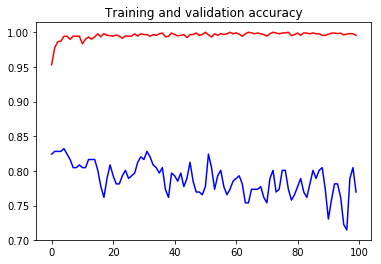

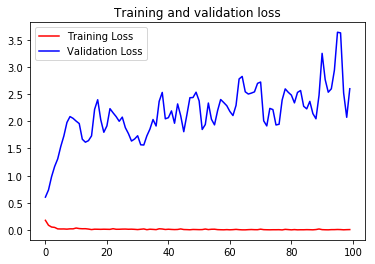

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()